<h1 style="text-align:center; font-family:Didot;">ARIMA model</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Arima import Arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

C:\Users\Anaconda\envs\scientific_pyt\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
df = pd.read_csv("final_data.csv")
pol = df[df["Country"] == "Poland"][["dt", "AverageTemperature"]]
pol["dt"] = pd.to_datetime(pol["dt"]) 
pol.rename(columns={"AverageTemperature": "T"}, inplace=True)
pol.head()

,dt,T
234718,1900-01-01,-3.182
234719,1900-02-01,-1.206
234720,1900-03-01,-0.705
234721,1900-04-01,6.234
234722,1900-05-01,11.476


In [3]:
def stationarity(x):
    print(f"adfuller pvalue: {adfuller(x)[1]}")
    fig, ax = plt.subplots(1, 2)
    plot_acf(x, ax=ax[0])
    plot_pacf(x, ax=ax[1], method="ywm")
    plt.show()

adfuller pvalue: 0.00020705568474049357


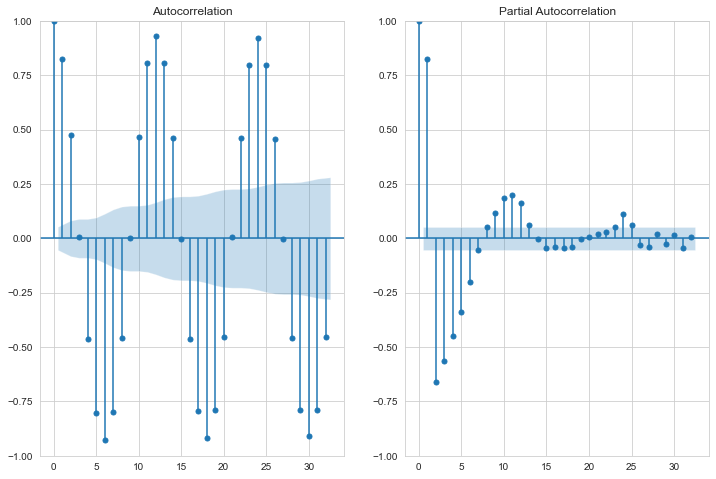

In [4]:
x = pol["T"].to_numpy()
stationarity(x)

In [5]:
model = Arima(x)
model.train()

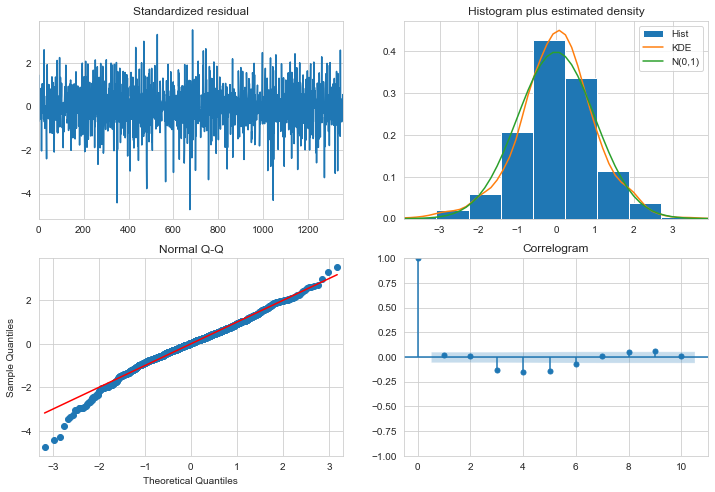

In [6]:
model._model.summary()
model._model.plot_diagnostics()
plt.show()

adfuller pvalue: 1.905093141501569e-29


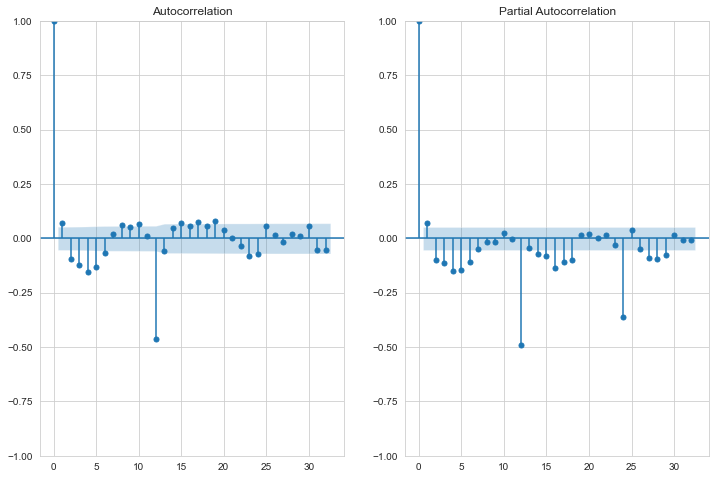

In [7]:
stationarity(model._decomposed)

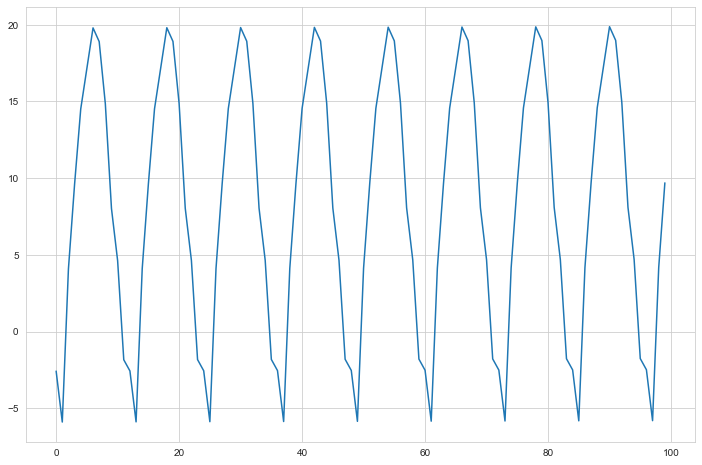

In [8]:
plt.plot(model.predict(100))
plt.show()

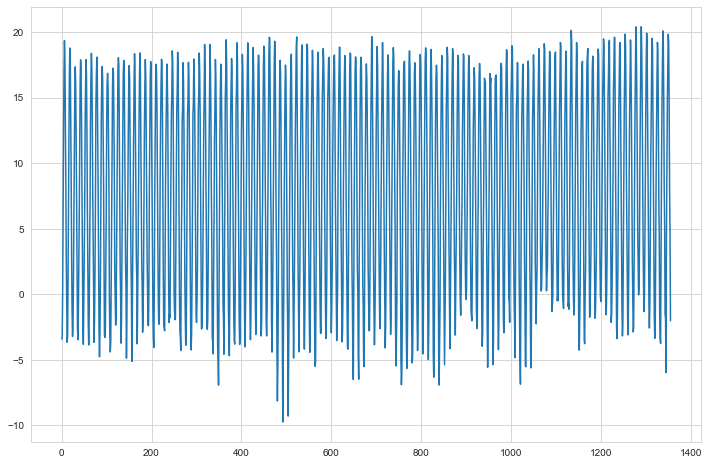

In [9]:
plt.plot(model.predict_in_sample())

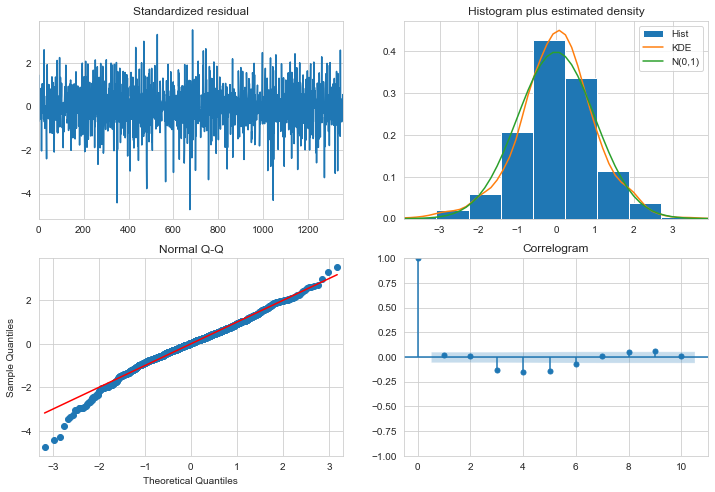

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1356
Model:               SARIMAX(0, 0, 2)   Log Likelihood               -2379.840
Date:                Mon, 21 Feb 2022   AIC                           4765.679
Time:                        12:52:16   BIC                           4781.316
Sample:                             0   HQIC                          4771.534
                               - 1356                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0424      0.025      1.679      0.093      -0.007       0.092
ma.L2         -0.1222      0.026     -4.671      0.000      -0.174      -0.071
sigma2         1.9585      0.059     33.444      0.000       1.844       2.073
===================================================================================
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):               135.12
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.37
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
# saving and loading check
# model.save("Poland")
# t = Arima(x)
# t.load("Poland")
# t._model.plot_diagnostics()
# plt.show()
# t._model.summary()